Related third party imports

In [1]:
import matplotlib.pyplot as plt

from numpy import arange, array

Variaveis globais

In [2]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 30

a = .0        # Inicio do intervalo da variavel independente 
b = 50.       # Final do intervalo da variavel independente
h = 1e-3      # Tamanho inicial de um passo de integracao

# Equacoes de diferenca

In [3]:
def f(r,t):
    x, y = r[0], r[1]
    fx, fy = y, y**2 - x - 5
    return array([fx, fy], float)

In [4]:
def passo_rk2(f,r,t,h):            # Calcula um passo no método de RK2
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    return k2   

In [5]:
def passo_lpf(f,r,rpm,t,h):        # Calcula um passo no método leapfrog
    r += h*f(rpm,t+0.5*h)          # Calculando valores nos pontos "inteiros"
    rpm += h*f(r,t+h)              # Calculando valores nos pontos "médios"
    return r, rpm                  # Retorna os NOVOS VALORES de r e rpm

Condicoes iniciais (e.g.: r(a))

In [6]:
ra = array([1.,.0],float)
r_lpf = ra
t = a

t_lista, x_lista = [], []

In [7]:
rpm = r_lpf + passo_rk2(f,r_lpf,t,h/2)  # Inicializando valores no ponto "médio"
while t<=b:    # Realizando as integrações numéricas
    t_lista.append(t)
    x_lista.append(r_lpf[0])
    r_lpf, rpm = passo_lpf(f,r_lpf,rpm,t,h)
    t += h

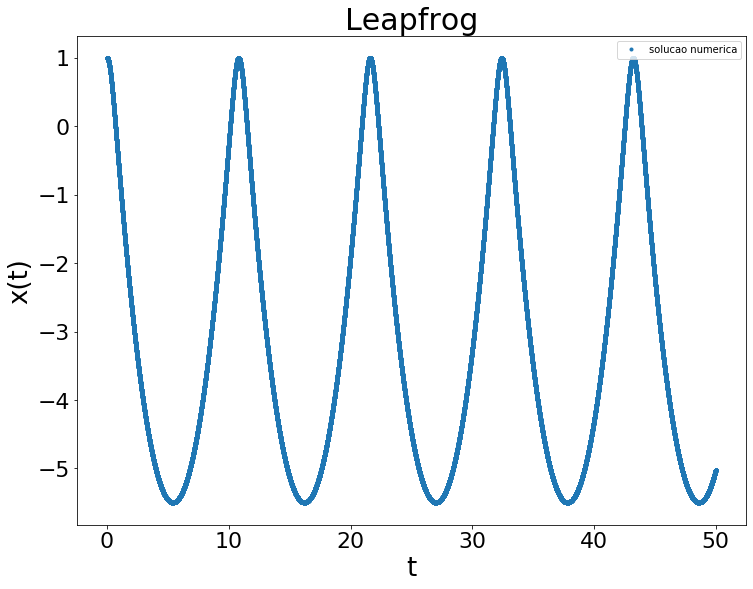

In [9]:
plt.figure(figsize=(12,9))
plt.plot(t_lista, x_lista, '.', label='solucao numerica')
plt.title("Leapfrog")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(loc='upper right')
plt.show()